In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt


path = "/content/drive/MyDrive/ML/train.csv"
data_train = pd.read_csv(path)

In [2]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [3]:
data_train.shape

(14999, 9)

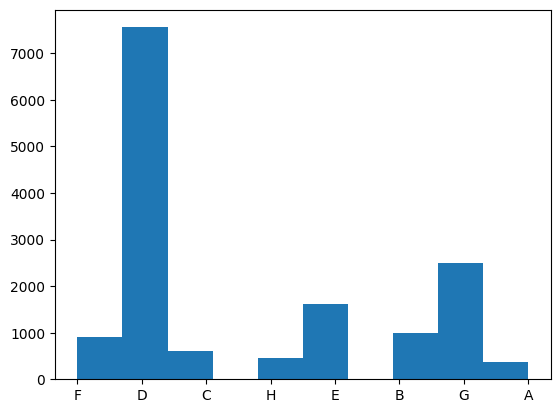

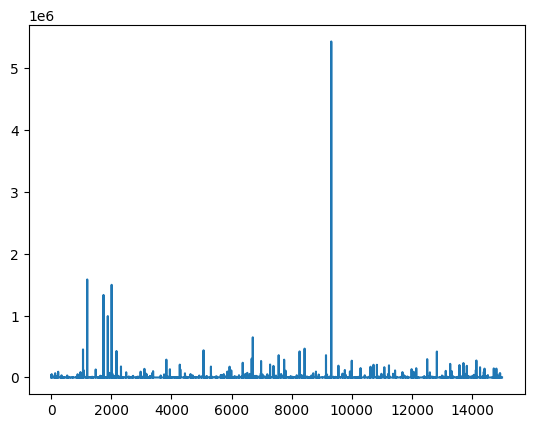

In [4]:
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

In [5]:
data_train = data_train[data_train["adview"] <2000000]

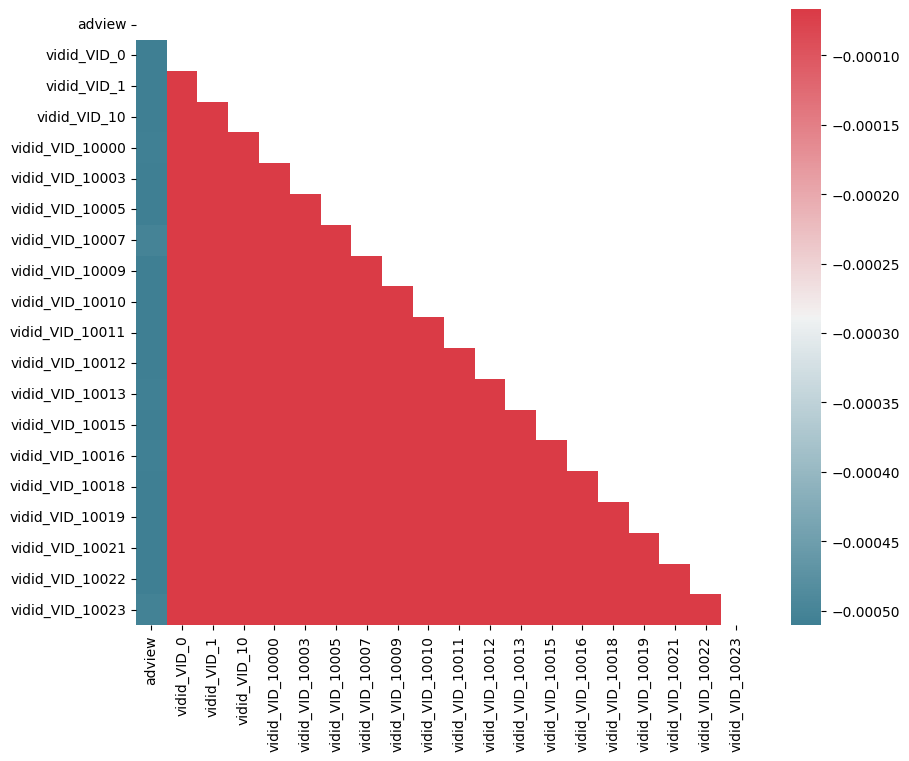

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming data_train is already defined and contains your data

# Step 1: Encode categorical data as numeric
data_train_encoded = pd.get_dummies(data_train)

# Step 2: Limit the number of columns if there are too many
# You can adjust the number of selected columns as needed
selected_columns = data_train_encoded.iloc[:, :20]  # Select the first 20 columns to reduce matrix size
corr = selected_columns.corr()  # Compute the correlation matrix

# Step 3: Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Step 4: Plot the heatmap without annotations for faster loading
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=False, fmt=".2f")  # Set annot=False for faster performance
plt.show()


In [7]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [8]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


# New Section

In [9]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import datetime
import time

# Read the CSV file
data_train = pd.read_csv("/content/drive/MyDrive/ML/train.csv")

# Convert numeric columns
numeric_columns = ["views", "comment", "likes", "dislikes", "adview"]
for col in numeric_columns:
    data_train[col] = pd.to_numeric(data_train[col], errors='coerce')

column_vidid = data_train['vidid']

# Encoding features (excluding category and duration)
le = LabelEncoder()
data_train['vidid'] = le.fit_transform(data_train['vidid'])
data_train['published'] = le.fit_transform(data_train['published'])

# Map category using the provided dictionary
category = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
data_train['category'] = data_train['category'].map(category)

# Convert Time_in_sec for duration
def duration_to_seconds(x):
    if not isinstance(x, str):
        return 0  # Return 0 for non-string input
    parts = x.replace('PT', '').replace('H', ':').replace('M', ':').replace('S', '').split(':')
    parts = [int(part) for part in parts if part != '']
    if len(parts) == 3:
        return parts[0] * 3600 + parts[1] * 60 + parts[2]
    elif len(parts) == 2:
        return parts[0] * 60 + parts[1]
    elif len(parts) == 1:
        return parts[0]
    else:
        return 0

# Apply duration_to_seconds function to duration
data_train["duration"] = data_train["duration"].apply(duration_to_seconds)

print(data_train.head())
print(data_train.dtypes)

   vidid  adview      views   likes  dislikes  comment  published  duration  \
0   6078      40  1031602.0  8523.0     363.0   1095.0       2170       457   
1   2869       2     1707.0    56.0       2.0      6.0       2187       570   
2   8339       1     2023.0    25.0       0.0      2.0       2096       136   
3   9215       6   620860.0   777.0     161.0    153.0       2121       262   
4    123       1      666.0     1.0       0.0      0.0       2093        31   

   category  
0         6  
1         4  
2         3  
3         8  
4         4  
vidid          int64
adview         int64
views        float64
likes        float64
dislikes     float64
comment      float64
published      int64
duration       int64
category       int64
dtype: object


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler




print("Columns with NaN values:")
print(data_train.isna().sum())


data_train_clean = data_train.dropna()
print(f"Rows before removing NaN: {len(data_train)}")
print(f"Rows after removing NaN: {len(data_train_clean)}")


print("Columns in the DataFrame:")
print(data_train_clean.columns)

# Split Data
if 'adview' in data_train_clean.columns:
    Y_train = pd.DataFrame(data=data_train_clean['adview'].values, columns=['target'])
    data_train_clean = data_train_clean.drop(['adview'], axis=1)
else:
    print("'adview' column not found. Please specify the target column.")


# Drop 'vidid' if it exists
if 'vidid' in data_train_clean.columns:
    data_train_clean = data_train_clean.drop(['vidid'], axis=1)

print(data_train_clean.head())

X_train, X_test, y_train, y_test = train_test_split(data_train_clean, Y_train, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")

# Normalise Data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Mean of X_train_scaled: {np.mean(X_train_scaled)}")
print(f"Mean of each column in X_train_scaled:")
print(np.mean(X_train_scaled, axis=0))

Columns with NaN values:
vidid          0
adview         0
views          2
likes        155
dislikes     155
comment      233
published      0
duration       0
category       0
dtype: int64
Rows before removing NaN: 14999
Rows after removing NaN: 14637
Columns in the DataFrame:
Index(['vidid', 'adview', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')
       views   likes  dislikes  comment  published  duration  category
0  1031602.0  8523.0     363.0   1095.0       2170       457         6
1     1707.0    56.0       2.0      6.0       2187       570         4
2     2023.0    25.0       0.0      2.0       2096       136         3
3   620860.0   777.0     161.0    153.0       2121       262         8
4      666.0     1.0       0.0      0.0       2093        31         4
X_train shape: (11709, 7)
Mean of X_train_scaled: 0.1738179381847734
Mean of each column in X_train_scaled:
[0.00520483 0.00983755 0.00523123 0.00556278 0.65083

In [12]:
from sklearn import metrics
import numpy as np

def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print("Linear Regression:")
print_error(X_test, y_test, linear_regression)

# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, y_train)
print("Support Vector Regressor:")
print_error(X_test, y_test, supportvector_regressor)


Linear Regression:
Mean Absolute Error: 5331.508003547418
Mean Squared Error: 10869727430.75181
Root Mean Squared Error: 104257.98497358277


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Regressor:
Mean Absolute Error: 3478.009002306698
Mean Squared Error: 10901273985.280918
Root Mean Squared Error: 104409.16619378261


In [13]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 4334.134221311476
Mean Squared Error: 11477918708.608948
Root Mean Squared Error: 107135.04892708524


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 4697.673958692017
Mean Squared Error: 10495472915.15457
Root Mean Squared Error: 102447.41536590648


In [14]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)

ann.summary()

print_error(X_test,y_test,ann)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 890109696.0000 - mean_squared_error: 890109696.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 639570880.0000 - mean_squared_error: 639570880.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1845707776.0000 - mean_squared_error: 1845707776.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 488457472.0000 - mean_squared_error: 488457472.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 958143744.0000 - mean_squared_error: 958143744.0000
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 385612928.0000 - mean_squared_error: 385612928.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 939923584.0000 - mean_squared_error: 939923584.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 538238720.0000 - mean_squared_error: 538238720.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 579459200.0000 - mean_squared_err

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 293 (1.15 KB)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196 (788.00 B)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error: 3897.99055851255
Mean Squared Error: 10891951092.020296
Root Mean Squared Error: 104364.51069219026


In [15]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [16]:
data_test = pd.read_csv("/content/drive/MyDrive/ML/test.csv")

In [17]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [18]:
from keras.models import load_model
model = load_model("/content/ann_youtubeadview.h5")

In [19]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [20]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [21]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [22]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [23]:
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

  train=pd.read_csv("test.csv")
mp = pd.read_csv(path)["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,457,2
1,3444,1040132,8171,340,1047,1825,570,6
2,1593,28534,31,11,1,1009,136,4
3,3775,1316715,2284,250,274,116,262,7
4,7644,1893173,2519,225,116,1892,31,2


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming data_train is your DataFrame from the previous step

# Check for NaN values
print("Columns with NaN values:")
print(data_train.isna().sum())

# Remove rows with NaN values
data_train_clean = data_train.dropna()
print(f"Rows before removing NaN: {len(data_train)}")
print(f"Rows after removing NaN: {len(data_train_clean)}")

# Print column names
print("Columns in the DataFrame:")
print(data_train_clean.columns)

# Split Data
if 'adview' in data_train_clean.columns:
    Y_train = pd.DataFrame(data=data_train_clean['adview'].values, columns=['target'])
    data_train_clean = data_train_clean.drop(['adview'], axis=1)
else:
    print("'adview' column not found. Please specify the target column.")
    # You might need to manually specify the target column here

# Drop 'vidid' if it exists
if 'vidid' in data_train_clean.columns:
    data_train_clean = data_train_clean.drop(['vidid'], axis=1)

print(data_train_clean.head())

X_train, X_test, y_train, y_test = train_test_split(data_train_clean, Y_train, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")

# Normalise Data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Mean of X_train_scaled: {np.mean(X_train_scaled)}")
print(f"Mean of each column in X_train_scaled:")
print(np.mean(X_train_scaled, axis=0))

Columns with NaN values:
vidid          0
adview         0
views          2
likes        155
dislikes     155
comment      233
published      0
duration       0
category       0
dtype: int64
Rows before removing NaN: 14999
Rows after removing NaN: 14637
Columns in the DataFrame:
Index(['vidid', 'adview', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')
       views   likes  dislikes  comment  published  duration  category
0  1031602.0  8523.0     363.0   1095.0       2170       457         6
1     1707.0    56.0       2.0      6.0       2187       570         4
2     2023.0    25.0       0.0      2.0       2096       136         3
3   620860.0   777.0     161.0    153.0       2121       262         8
4      666.0     1.0       0.0      0.0       2093        31         4
X_train shape: (11709, 7)
Mean of X_train_scaled: 0.1738179381847734
Mean of each column in X_train_scaled:
[0.00520483 0.00983755 0.00523123 0.00556278 0.65083

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming X_train is a DataFrame and X_test is a NumPy ndarray with extra columns

# Convert X_test to a DataFrame, selecting only the first 7 columns, and align column names with X_train
X_test_df = pd.DataFrame(X_test).iloc[:, :7]  # Select the first 7 columns of X_test
X_test_df.columns = X_train.columns  # Assign column names from X_train to X_test_df

# Print shapes and columns to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test_df.shape)
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test_df.columns)

# Ensure X_train and X_test_df have the same number of features
if X_train.shape[1] != X_test_df.shape[1]:
    raise ValueError("Mismatch in number of features between X_train and X_test")

# Proceed with fitting the scaler and transforming X_test once features are aligned
scaler = MinMaxScaler()
scaler.fit(X_train)  # Fit scaler on X_train
X_test_scaled = scaler.transform(X_test_df)  # Transform X_test_df to the same scale

# Assuming 'model' is your trained model, predict 'adview' on X_test_scaled
prediction = model.predict(X_test_scaled)

# Create a DataFrame with the predictions and name the column 'Adview'
prediction_df = pd.DataFrame(prediction, columns=["Adview"])

# Example: Creating prediction DataFrame from a predefined array for testing
prediction_array = np.array([2167.144043, 2330.150879, 1572.538940, 1154.258423, 2101.321289])
prediction_df = pd.DataFrame(prediction_array, columns=["Adview"])

# Display the head of the DataFrame
print(prediction_df.head())


X_train shape: (11709, 7)
X_test shape: (2928, 7)
X_train columns: Index(['views', 'likes', 'dislikes', 'comment', 'published', 'duration',
       'category'],
      dtype='object')
X_test columns: Index(['views', 'likes', 'dislikes', 'comment', 'published', 'duration',
       'category'],
      dtype='object')
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
        Adview
0  2167.144043
1  2330.150879
2  1572.538940
3  1154.258423
4  2101.321289
